## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

## Obtaining Data

In [2]:
data = pd.DataFrame(pd.read_csv("world_happiness.csv"))
data.head()

,Continent,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Europe,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Europe,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Europe,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Europe,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
data.columns = data.columns.str.strip().str.lower().str.replace('.', '_')
data.head(2)

,continent,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy__gdp_per_capita_,family,health__life_expectancy_,freedom,generosity,trust__government_corruption_,dystopia_residual
0,Europe,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [4]:
data.shape

(155, 13)

## Cleaning the data
1. Renaming some of the columns

In [5]:
data.columns = ['continent','country', 'happiness_rank', 'happiness_score', 'whisker_high', 'whisker_low', 'economy','family','health','freedom','generosity','trust','dystopia_residual'] 
data.head(2)

,continent,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


2. Removing unnecessary columns: 

In [6]:
data.drop(data.columns[[4,5]], axis = 1, inplace = True)
data.head(2)

,continent,country,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [7]:
data.shape

(155, 11)

In [8]:
data.columns

Index(['continent', 'country', 'happiness_rank', 'happiness_score', 'economy',
       'family', 'health', 'freedom', 'generosity', 'trust',
       'dystopia_residual'],
      dtype='object')

In [9]:
data.describe()

,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
continent            155 non-null object
country              155 non-null object
happiness_rank       155 non-null int64
happiness_score      155 non-null float64
economy              155 non-null float64
family               155 non-null float64
health               155 non-null float64
freedom              155 non-null float64
generosity           155 non-null float64
trust                155 non-null float64
dystopia_residual    155 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.4+ KB


In [11]:
print('Number of Null values in Columns')
data.isnull().sum()

Number of Null values in Columns


continent            0
country              0
happiness_rank       0
happiness_score      0
economy              0
family               0
health               0
freedom              0
generosity           0
trust                0
dystopia_residual    0
dtype: int64

No null values in the entire data set

## Visualisation
1. Correlation plot:

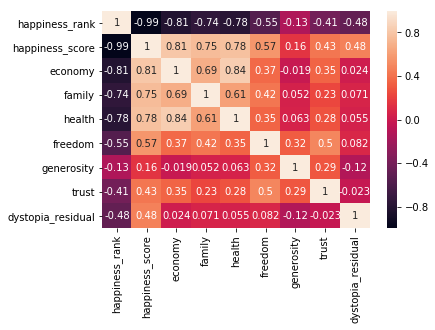

In [12]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
data.drop(data.columns[[2]], axis = 1, inplace = True)
data.head(2)

,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


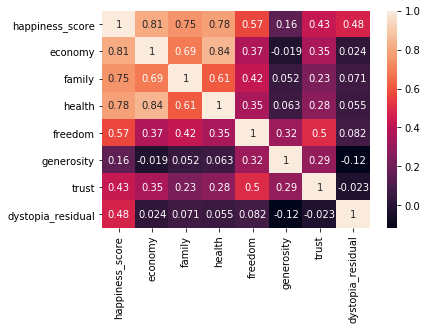

In [14]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

2. Creating separate dataframe for each continent:

In [15]:
data.head(2)

,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [16]:
#asia
asia = data["continent"] == "Asia"
asia_df = data[asia]
asia_data = asia_df.mean()
asia_mean = asia_data['happiness_score']
print("Mean of happiness score -", asia_mean)
asia_df.head(2)

Mean of happiness score - 5.2841249763499984


,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
10,Asia,Israel,7.213,1.375382,1.37629,0.838404,0.405989,0.330083,0.085242,2.801757
20,Asia,United Arab Emirates,6.648,1.626343,1.26641,0.726798,0.608345,0.360942,0.324490,1.734704


In [17]:
#africa
africa = data["continent"] == "Africa"
africa_df = data[africa]
africa_data = africa_df.mean()
africa_mean = africa_data['happiness_score']
print("Mean of happiness score -", africa_mean)
africa_df.head(2)

Mean of happiness score - 4.376326531755102


,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
33,Africa,Spain,6.403,1.384398,1.532091,0.888961,0.408781,0.190134,0.070914,1.927758
52,Africa,Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604


In [18]:
#europe
europe = data["continent"] == "Europe"
europe_df = data[europe]
europe_data = europe_df.mean()
europe_mean = europe_data['happiness_score']
print("Mean of happiness score -", europe_mean)
europe_df.head(2)

Mean of happiness score - 6.102225017600002


,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [19]:
#north america
nm = data["continent"] == "North America"
nm_df = data[nm]
nm_data = nm_df.mean()
nm_mean = nm_data['happiness_score']
print("Mean of happiness score -", nm_mean)
nm_df.head(2)

Mean of happiness score - 6.028214301428572


,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
6,North America,Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
11,North America,Costa Rica,7.079,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,2.898639


In [20]:
#south america
sm = data["continent"] == "South America"
sm_df = data[sm]
sm_data = sm_df.mean()
sm_mean = sm_data['happiness_score']
print("Mean of happiness score -", sm_mean)
sm_df.head(2)

Mean of happiness score - 6.0986000061


,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
19,South America,Chile,6.652,1.252785,1.284025,0.819480,0.376895,0.326662,0.082288,2.509586
21,South America,Brazil,6.635,1.107353,1.431306,0.616552,0.437454,0.162350,0.111093,2.769267


In [21]:
#Australia
aus = data["continent"] == "Australia"
aus_df = data[aus]
aus_data = aus_df.mean()
aus_mean = aus_data['happiness_score']
print("Mean of happiness score -", aus_mean)
aus_df.head(2)

Mean of happiness score - 7.299000025


,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
7,Australia,New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
9,Australia,Australia,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


.

3. Correlation plot for each continent:

Text(0.5, 1.0, 'Happiness Matrix for Asia')

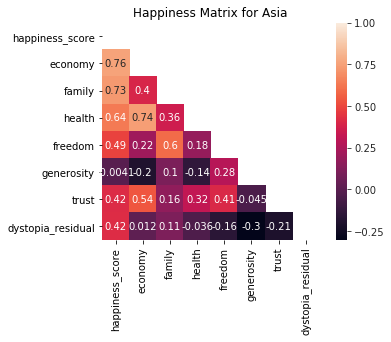

In [22]:
corr_asia = asia_df.corr()

mask = np.zeros_like(corr_asia)
mask[np.triu_indices_from(mask)] = True
ax = plt.axes()
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_asia, mask=mask, square=True, annot = True, ax=ax)
ax.set_title('Happiness Matrix for Asia')

Text(0.5, 1.0, 'Happiness Matrix for Africa')

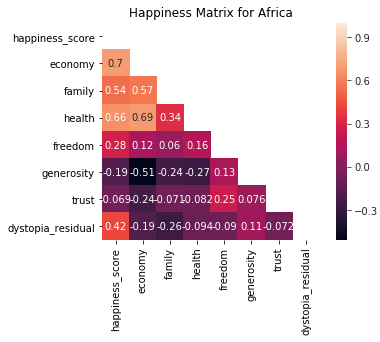

In [23]:
corr_africa = africa_df.corr()

mask = np.zeros_like(corr_africa)
mask[np.triu_indices_from(mask)] = True
ax = plt.axes()
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_africa, mask=mask, square=True, annot = True, ax=ax)
ax.set_title('Happiness Matrix for Africa')

Text(0.5, 1.0, 'Happiness Matrix for Europe')

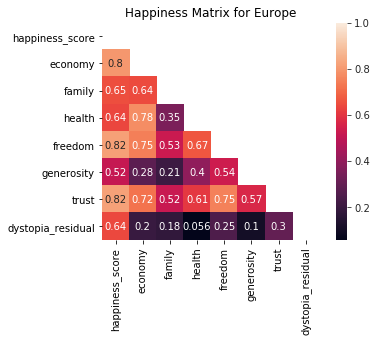

In [24]:
corr_europe = europe_df.corr()

mask = np.zeros_like(corr_europe)
mask[np.triu_indices_from(mask)] = True
ax = plt.axes()
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_europe, mask=mask, square=True, annot = True, ax=ax)
ax.set_title('Happiness Matrix for Europe')

Text(0.5, 1.0, 'Happiness Matrix for North America')

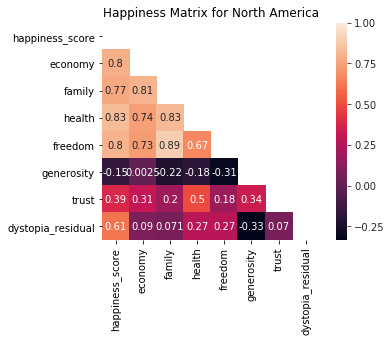

In [25]:
corr_nm = nm_df.corr()

mask = np.zeros_like(corr_nm)
mask[np.triu_indices_from(mask)] = True
ax = plt.axes()
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_nm, mask=mask, square=True, annot = True, ax=ax)
ax.set_title('Happiness Matrix for North America')

Text(0.5, 1.0, 'Happiness Matrix for South America')

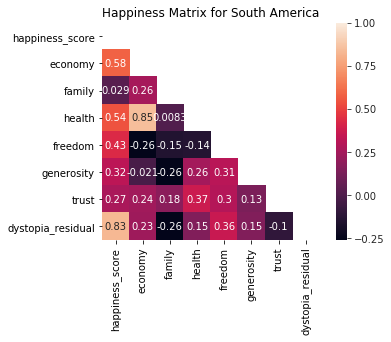

In [26]:
corr_sm = sm_df.corr()

mask = np.zeros_like(corr_sm)
mask[np.triu_indices_from(mask)] = True
ax = plt.axes()
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_sm, mask=mask, square=True, annot = True, ax=ax)
ax.set_title('Happiness Matrix for South America')

Text(0.5, 1.0, 'Happiness Matrix for Australia')

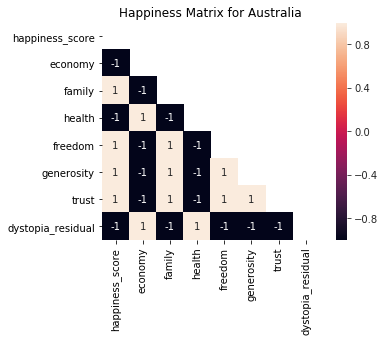

In [27]:
corr_aus = aus_df.corr()

mask = np.zeros_like(corr_aus)
mask[np.triu_indices_from(mask)] = True
ax = plt.axes()
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_aus, mask=mask, square=True, annot = True, ax=ax)
ax.set_title('Happiness Matrix for Australia')

.

.

In [28]:
clr = {"Europe": "b", "North America": "g", "Australia":"r", "Asia": "c", "South America": "m", "Africa":"y"}

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

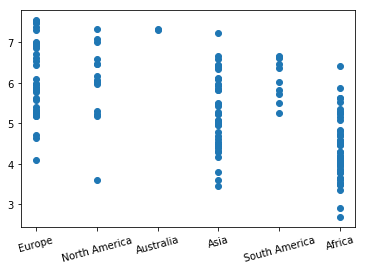

In [29]:
plt.scatter(data["continent"], data["happiness_score"], cmap=clr )
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

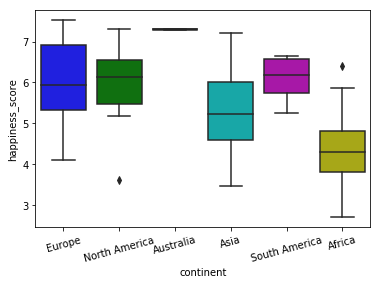

In [30]:
sns.boxplot( x=data["continent"], y=data["happiness_score"], palette=clr )
plt.xticks(rotation=15)

C:\Users\71guk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

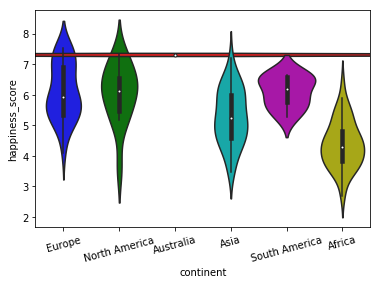

In [31]:
sns.violinplot( x=data["continent"], y=data["happiness_score"], width=25, palette=clr )
plt.xticks(rotation=15)

C:\Users\71guk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


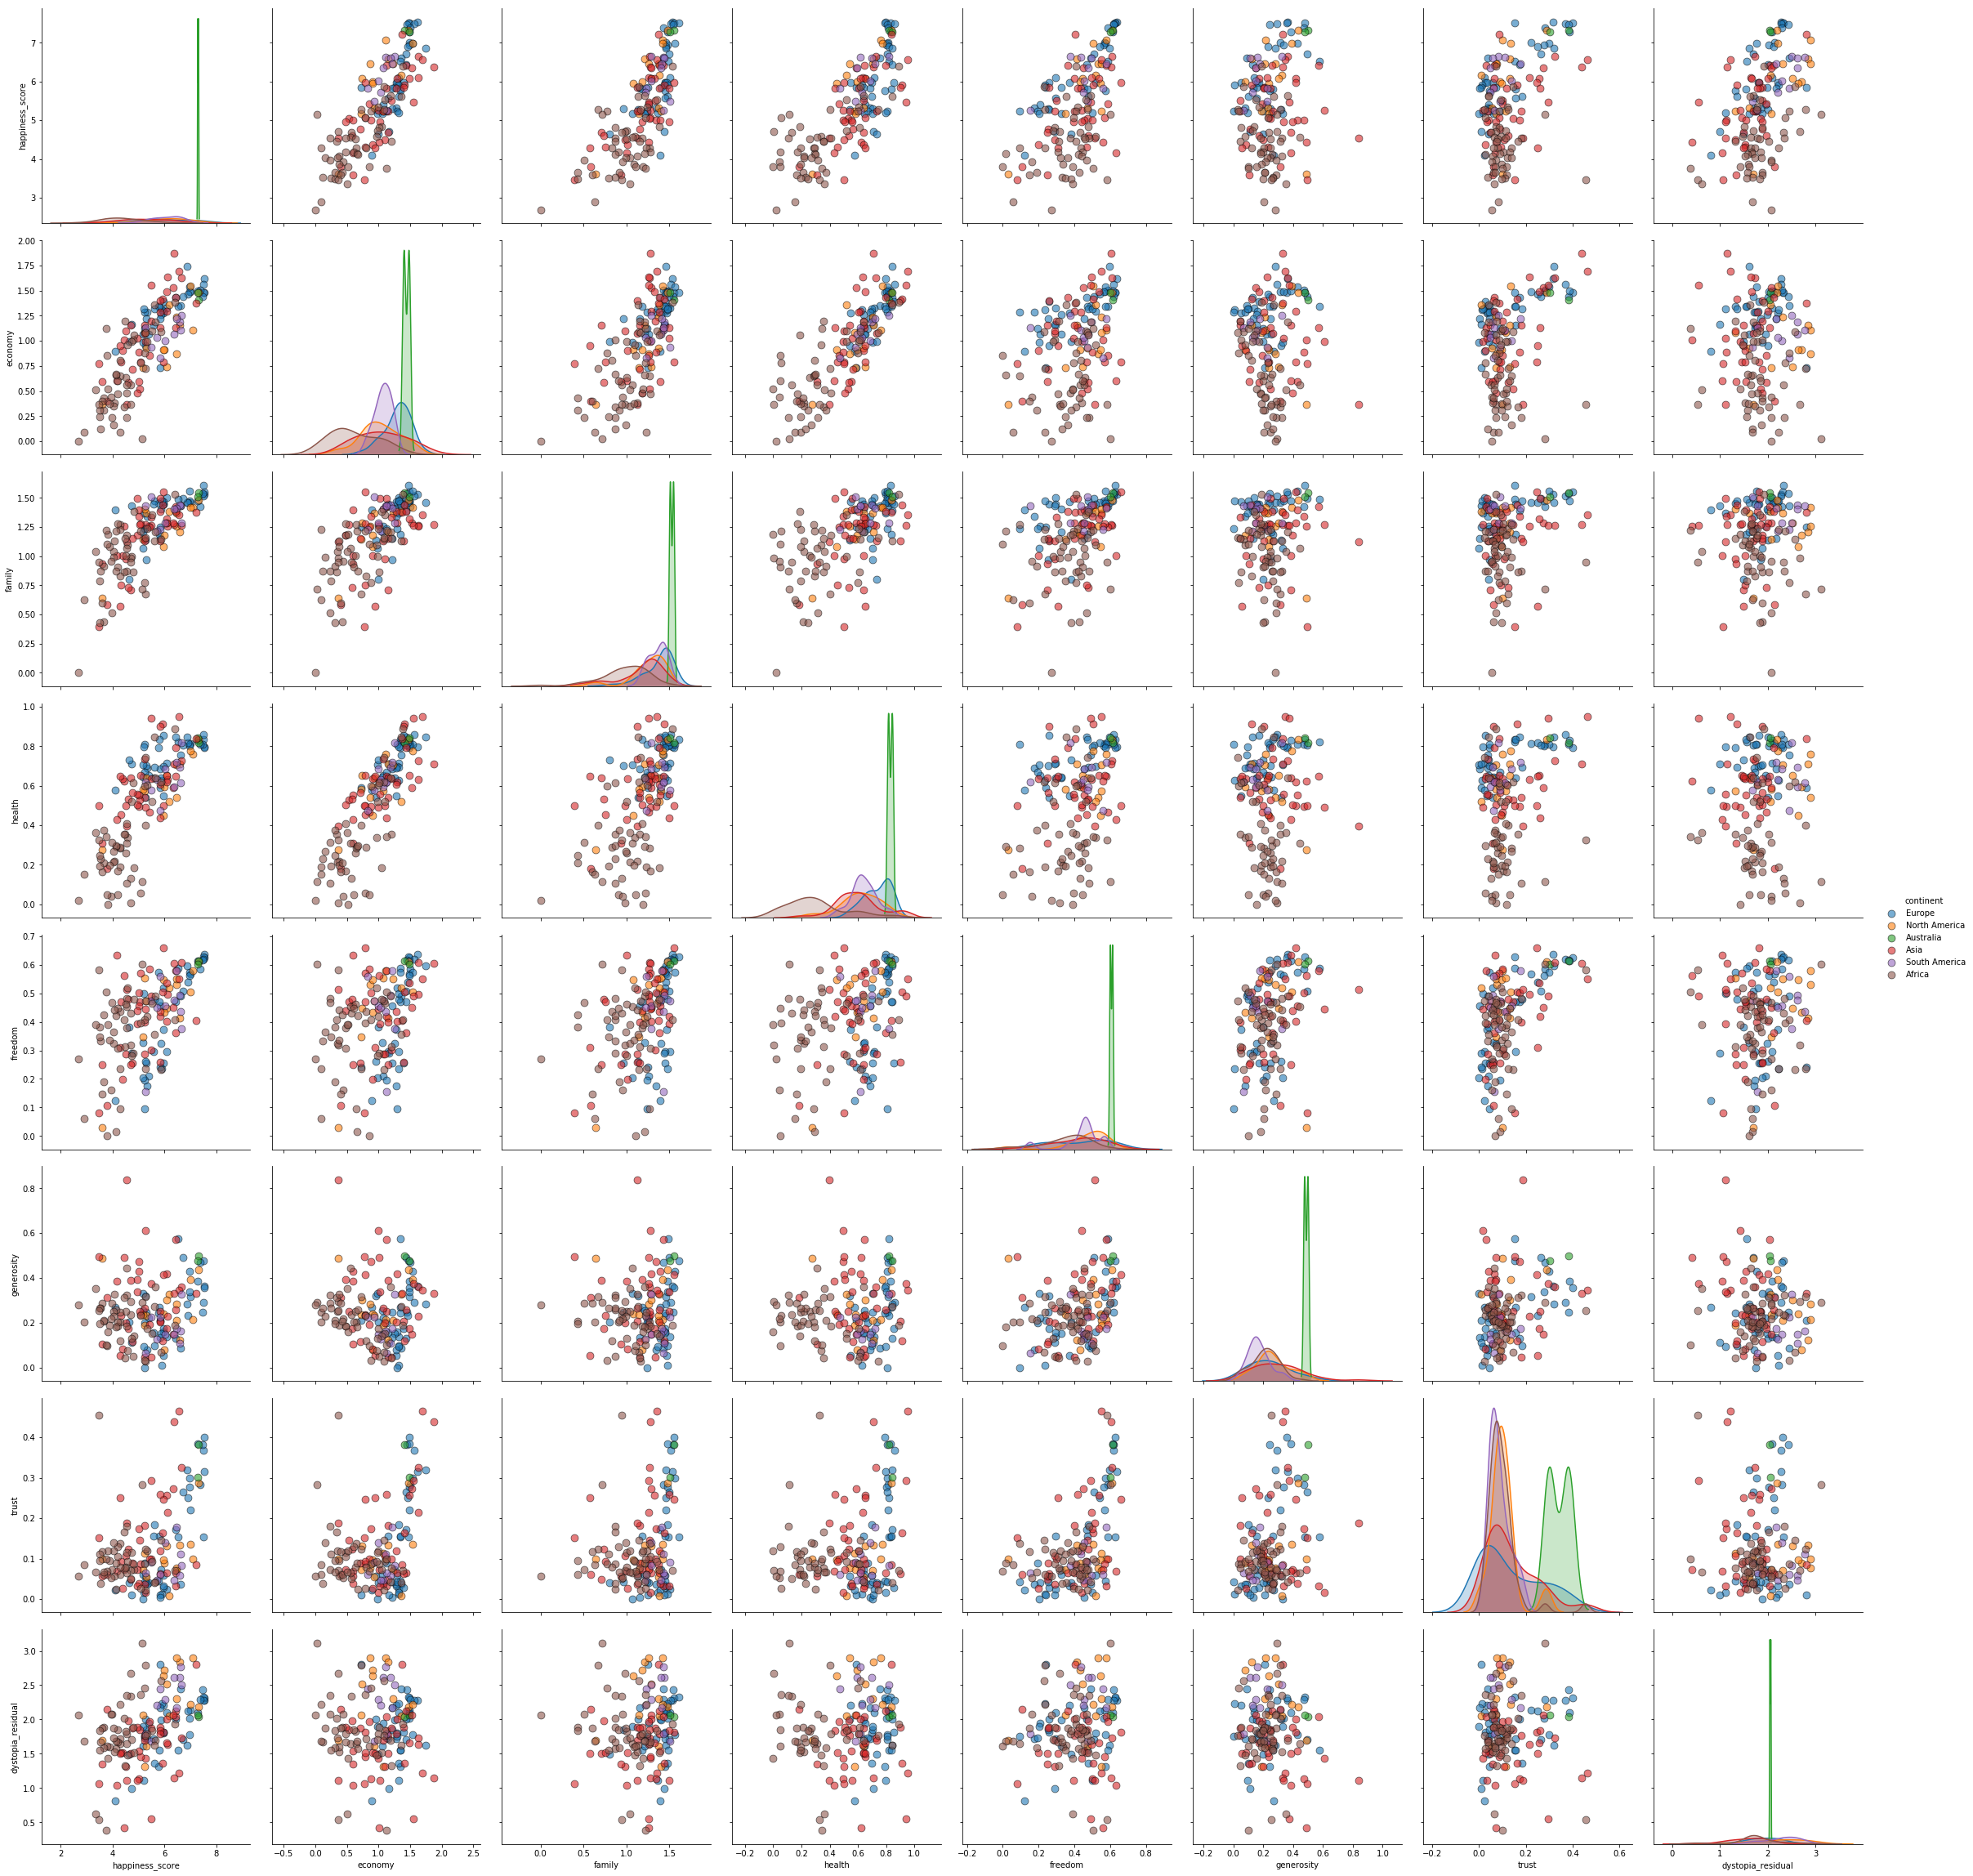

In [32]:
grid = sns.pairplot(data, hue = 'continent', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
grid
grid.savefig('PairPlot.png')

##  Regresssion

1. Multiple Linear Regression:

In [33]:
data.head(2)

,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Europe,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Europe,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [34]:
#ENCODING 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data[data.columns[0]] = labelencoder.fit_transform(data[data.columns[0]])
data[data.columns[1]] = labelencoder.fit_transform(data[data.columns[1]])

In [35]:
data.head(2)

,continent,country,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,3,104,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,3,37,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [36]:
X = data[data.columns[[0,1,3,4,5,6,7,8,9]]]
y = data[data.columns[2]]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

reg=LinearRegression()

In [38]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
reg.score(X_train,y_train)

0.9999999377588396

In [40]:
pdt = reg.predict(X_test)
pdt

array([6.37453934, 2.90459427, 5.52495114, 3.93631008, 5.97282515,
       6.00843151, 7.07909285, 5.62094006, 6.57761426, 7.00620481,
       5.96297902, 4.95490839, 5.26910156, 6.45375223, 6.16776719,
       4.1683153 , 4.29066519, 6.09749591, 4.80513999, 7.28363182,
       7.49428095, 3.8745638 , 6.44159501, 5.96372786, 6.00318852,
       5.29328891, 3.349189  , 6.60878696, 6.57202951, 5.19524237,
       5.43028978])

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test,pdt))
rms

0.00028407516622556533

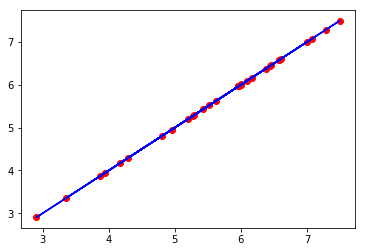

In [42]:
plt.scatter(pdt, y_test, color = 'red') 

# plot predicted data 
plt.plot(pdt, y_test, color = 'blue') 

.